In [27]:
%load_ext autoreload

%autoreload 2

from reproducibility.reproducibility import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Toy examples

## Moon dataset

### Training

In [28]:
AlignExperiment.run("--dataset=moon  --h_dim=64  --n_layers=2  --n_epochs=10  --reg_weight=1.  --timestep_emb_dim=32  --in_dim=2 --out_dim=2  --diffusivity_schedule=fbb  --max_diffusivity=.7 --H=.5 --K=0 --use_drift_in_doobs=True  --activation=silu").save("moon_silu")

config {'data_dir': 'moon', 'log_dir': '../reproducibility/moon/model', 'config': None, 'task': 'synthetic', 'wandb_entity': None, 'group_name': None, 'wandb_mode': 'online', 'job_type': 'dev-train', 'online': False, 'dataset': 'moon', 'n_samples': 10000, 'train_bs': 32, 'val_bs': 8, 'transform': None, 'split_fracs': [0.8, 0.1, 0.1], 'num_workers': 1, 'in_dim': 2, 'out_dim': 2, 'timestep_emb_dim': 32, 'h_dim': 64, 'n_layers': 2, 'activation': 'silu', 'dropout_p': 0.1, 'run_name': 'qxjfkjezt', 'n_epochs': 10, 'use_grad_noise': False, 'drift_weight': 1.0, 'reg_weight': 1.0, 'reg_weight_T': 1.0, 'reg_weight_t': 1.0, 'diffusivity_schedule': 'fbb', 'max_diffusivity': 0.7, 'H': 0.5, 'K': 0, 'use_drift_in_doobs': True, 'optim_name': 'adamw', 'lr': 0.001, 'weight_decay': 0.001, 'grad_clip_value': 10.0, 'scheduler': 'plateau', 'scheduler_mode': 'min', 'scheduler_patience': 10, 'ema_decay_rate': 0.999, 'log_every': 1000, 'eval_every': 10000, 'inference_every': 0, 'inference_steps': 100, 'inferen

### Inference

In [29]:
moon = AlignExperiment.load("moon_silu")

Args: {'data_dir': 'moon', 'log_dir': '../reproducibility/moon/model', 'config': None, 'task': 'synthetic', 'wandb_entity': None, 'group_name': None, 'wandb_mode': 'online', 'job_type': 'dev-train', 'online': False, 'dataset': 'moon', 'n_samples': 10000, 'train_bs': 32, 'val_bs': 8, 'transform': None, 'split_fracs': [0.8, 0.1, 0.1], 'num_workers': 1, 'in_dim': 2, 'out_dim': 2, 'timestep_emb_dim': 32, 'h_dim': 64, 'n_layers': 2, 'activation': 'silu', 'dropout_p': 0.1, 'run_name': 'qxjfkjezt', 'n_epochs': 10, 'use_grad_noise': False, 'drift_weight': 1.0, 'reg_weight': 1.0, 'reg_weight_T': 1.0, 'reg_weight_t': 1.0, 'diffusivity_schedule': 'fbb', 'max_diffusivity': 0.7, 'H': 0.5, 'K': 0, 'use_drift_in_doobs': True, 'optim_name': 'adamw', 'lr': 0.001, 'weight_decay': 0.001, 'grad_clip_value': 10.0, 'scheduler': 'plateau', 'scheduler_mode': 'min', 'scheduler_patience': 10, 'ema_decay_rate': 0.999, 'log_every': 1000, 'eval_every': 10000, 'inference_every': 0, 'inference_steps': 100, 'inferenc

/home/fe/nobis/Projects/bridge/aligned_diffusion_bridges/reproducibility/reproducibility.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.loa

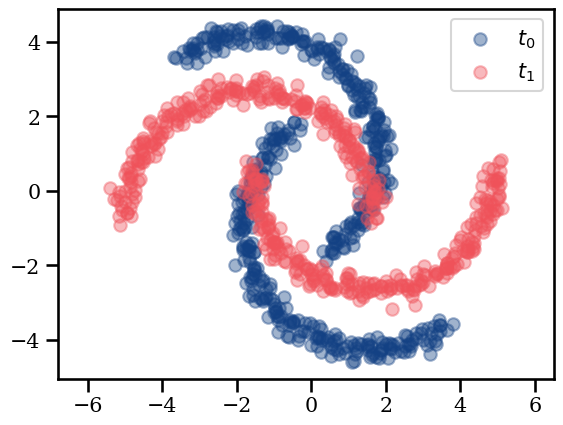

In [30]:
plot_marginals(moon.get_marginals())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
samples shape (101, 500, 2)


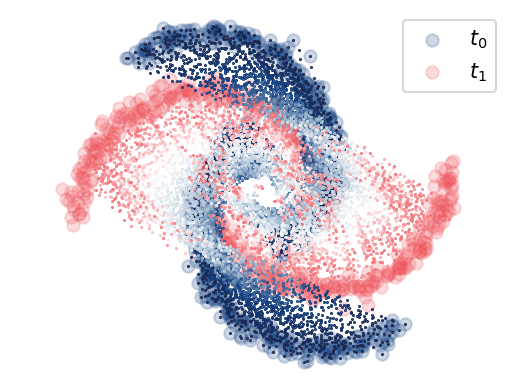

In [31]:
%load_ext autoreload

%autoreload 2

plt.axis("off")
plt.axis("equal")
plot_marginals(moon.get_marginals(), alpha=.2)

#print(.shape)
samples = moon.sample(samples_num=500, trials_num=7)
print('samples shape',samples.shape)
if len(samples.shape) == 3:
    plot_multiple_marginals(samples, skip_step=4)
else:
    plot_multiple_marginals(samples[:,:,:,0], skip_step=4)      
export_fig("fig_sb_align_moon_traj")

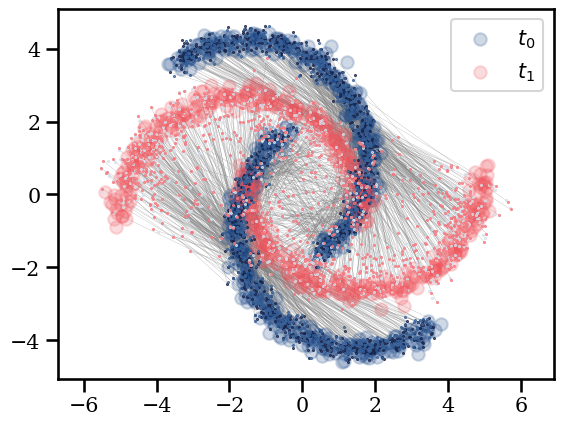

In [32]:
plot_marginals(moon.get_marginals(), alpha=.2)

moon_sampled = moon.sample(samples_num=1000, trials_num=2)
plot_matchings(*moon_sampled[[0,-1]])
plot_multiple_marginals(moon_sampled[[0,1,-2,-1]], skip_step=1, alpha=.9)

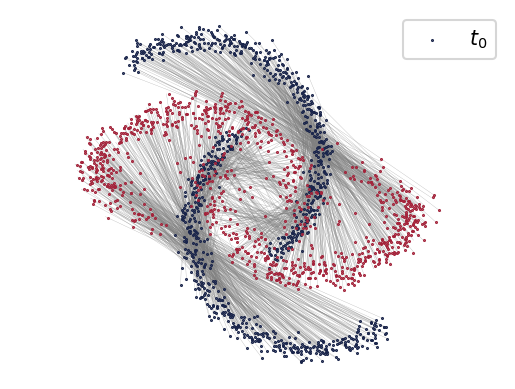

In [33]:
plt.axis("off")
plt.axis("equal")

moon_sampled = moon.sample(samples_num=1000, trials_num=7)
plot_matchings(*moon_sampled[[0,-1]])
plot_multiple_marginals(moon_sampled, skip_step=99, labels=[r"$t_0$", r"$t_1$"], alpha=1)
export_fig("fig_sb_align_moon_match")

/home/fe/nobis/Projects/bridge/aligned_diffusion_bridges/sbalign/data/datasets.py:172: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  
/home/fe/nobis/Projects/bridge/aligned_

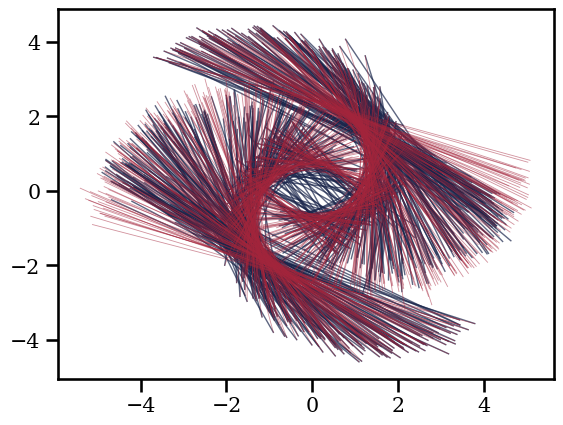

In [34]:
plot_matchings(*moon.sample(samples_num=500, trials_num=7)[[0,-1]], color=palette[0], lw=1.)
plot_matchings(*moon.get_marginals().values(), color=palette[-1], lw=.6, alpha=.5)

## T dataset

### Training

In [35]:
# AlignExperiment.run("--dataset=diagonal_matching  --h_dim=32  --n_layers=3  --n_epochs=20  --reg_weight=1.  --timestep_emb_dim=32  --diffusivity_schedule=constant  --max_diffusivity=1.  --use_drift_in_doobs=True  --activation=selu").save("t_dataset")

### Inference

In [36]:
t_dataset = AlignExperiment.load("t_dataset")

Args: {'data_dir': 'diagonal_matching', 'log_dir': 'diagonal_matching/model', 'config': None, 'wandb_id': None, 'wandb_entity': 'sb-paired', 'wandb_project': None, 'run_name': 'hcypfnvih', 'online': False, 'dataset': 'diagonal_matching', 'n_samples': 10000, 'train_bs': 32, 'val_bs': 8, 'transform': None, 'split_fracs': [0.8, 0.1, 0.1], 'num_workers': 1, 'in_dim': 2, 'out_dim': 2, 'timestep_emb_dim': 32, 'h_dim': 32, 'n_layers': 3, 'activation': 'selu', 'dropout_p': 0.1, 'n_epochs': 20, 'use_grad_noise': False, 'drift_weight': 1.0, 'reg_weight': 1.0, 'diffusivity_schedule': 'constant', 'max_diffusivity': 1.0, 'use_drift_in_doobs': True, 'optim_name': 'adam', 'lr': 0.001, 'weight_decay': 0.001, 'grad_clip_value': 1.0, 'scheduler': 'plateau', 'scheduler_mode': 'min', 'ema_decay_rate': 0.999, 'log_every': 1000, 'eval_every': 10000, 'inference_every': 0, 'inference_steps': 100, 'inference_metric': 'val_rmsd', 'inference_goal': 'min', 'early_stop_metric': 'val_loss', 'early_stop_goal': 'min'

/home/fe/nobis/Projects/bridge/aligned_diffusion_bridges/reproducibility/reproducibility.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.loa

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

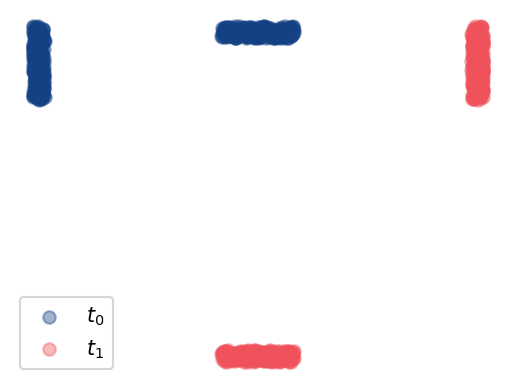

In [ ]:
plt.axis('off');
plot_marginals(t_dataset.get_marginals())

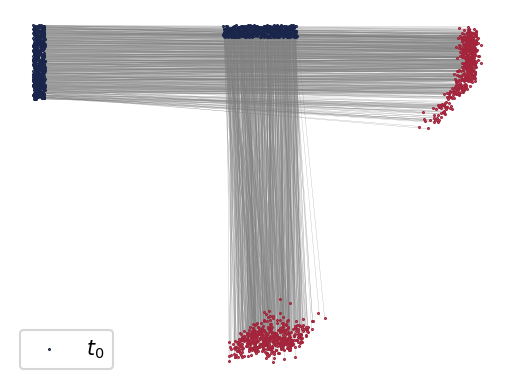

In [ ]:
plt.axis("off")
plt.axis("equal")
t_sampled = t_dataset.sample(samples_num=1000, trials_num=50)
plot_multiple_marginals(t_sampled, skip_step=99, labels=[r"$t_0$", r"$t_1$"], alpha=1)
plot_matchings(*t_sampled[[0,-1]])
export_fig("fig_sb_align_t_match")

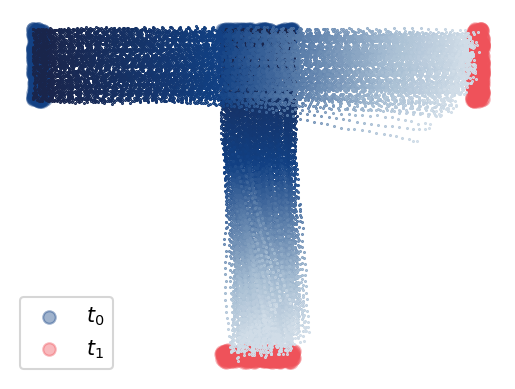

In [ ]:
plt.axis("off")
plt.axis("equal")
plot_marginals(t_dataset.get_marginals())
plot_multiple_marginals(t_dataset.sample(trials_num=50), skip_step=2)
export_fig("fig_sb_align_t_traj")

## T dataset (inverse)

### Training

In [ ]:
# AlignExperiment.run("--dataset=diagonal_matching_inverse  --h_dim=32  --n_layers=3  --n_epochs=20  --reg_weight=1.  --timestep_emb_dim=32  --diffusivity_schedule=constant  --max_diffusivity=1.  --use_drift_in_doobs=True  --activation=selu").save("t_dataset_inverse")

### Inference

In [ ]:
t_dataset_inverse = AlignExperiment.load("t_dataset_inverse")

Args: {'data_dir': 'diagonal_matching_inverse', 'log_dir': 'diagonal_matching_inverse/model', 'config': None, 'wandb_id': None, 'wandb_entity': 'sb-paired', 'wandb_project': None, 'run_name': 'wntpmqdhj', 'online': False, 'dataset': 'diagonal_matching_inverse', 'n_samples': 10000, 'train_bs': 32, 'val_bs': 8, 'transform': None, 'split_fracs': [0.8, 0.1, 0.1], 'num_workers': 1, 'in_dim': 2, 'out_dim': 2, 'timestep_emb_dim': 32, 'h_dim': 32, 'n_layers': 3, 'activation': 'selu', 'dropout_p': 0.1, 'n_epochs': 20, 'use_grad_noise': False, 'drift_weight': 1.0, 'reg_weight': 1.0, 'diffusivity_schedule': 'constant', 'max_diffusivity': 1.0, 'use_drift_in_doobs': True, 'optim_name': 'adam', 'lr': 0.001, 'weight_decay': 0.001, 'grad_clip_value': 1.0, 'scheduler': 'plateau', 'scheduler_mode': 'min', 'ema_decay_rate': 0.999, 'log_every': 1000, 'eval_every': 10000, 'inference_every': 0, 'inference_steps': 100, 'inference_metric': 'val_rmsd', 'inference_goal': 'min', 'early_stop_metric': 'val_loss', 

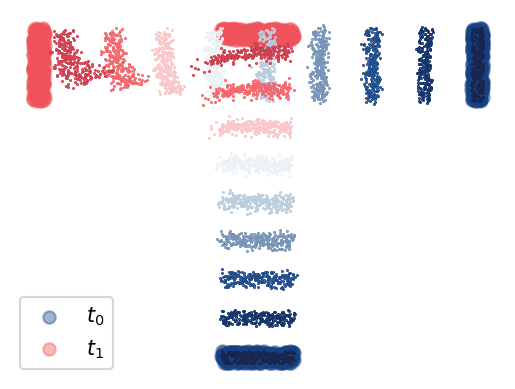

In [ ]:
plt.axis('off');
plot_marginals(t_dataset_inverse.get_marginals())
plot_multiple_marginals(t_dataset_inverse.sample(trials_num=50), skip_step=12)

In [ ]:
common_marginals = t_dataset.get_marginals()

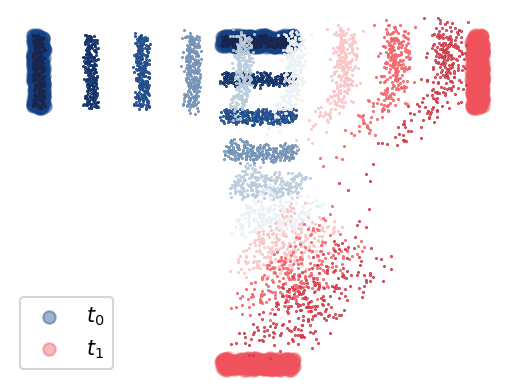

In [ ]:
plt.axis('off');
plot_marginals(common_marginals)
plot_multiple_marginals(mix_trajs(t_dataset.sample(input_data=common_marginals['initial'].to(DEVICE), trials_num=50), sample_inverse(t_dataset_inverse, input_data=common_marginals['initial'].to(DEVICE), trials_num=20)), skip_step=12)